# Demonstration for Paragraph Coverage Data

In this notebook we analyse the output from paragraph's coverage track. We use a an insertion from Platinum Genomes which is heterozygous in NA12878. We have two paths: a reference path and an alternate path which includes the inserted sequence:

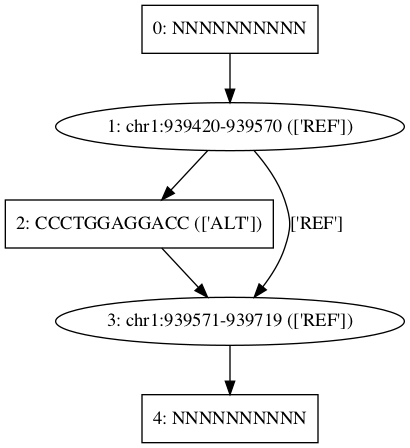

In [1]:
from IPython.display import Image
Image(filename="pg-het-ins.png")

Paragraph calculates coverage on the ref and alt paths. We can visualize this as follows.

In [2]:
import pandas
import json
import rpy2
import numpy as np
%load_ext rpy2.ipython

In [3]:
%%R
library(ggplot2)

/Users/pkrusche/anaconda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Find out what's changed in ggplot2 at
http://github.com/tidyverse/ggplot2/releases.

  warnings.warn(x, RRuntimeWarning)


In [4]:
def get_data(filename):
    with open(filename) as f:
        data = json.load(f)
    
    paths = []
    for pathname, coverage in data["path_coverage"].items():
        cov_data = pandas.DataFrame(coverage)
        cov_data["label"] = pathname
        paths.append(cov_data)

    all_data = pandas.concat(paths)
    return all_data

In [5]:
test_data = get_data('pg-het-ins.result.json')

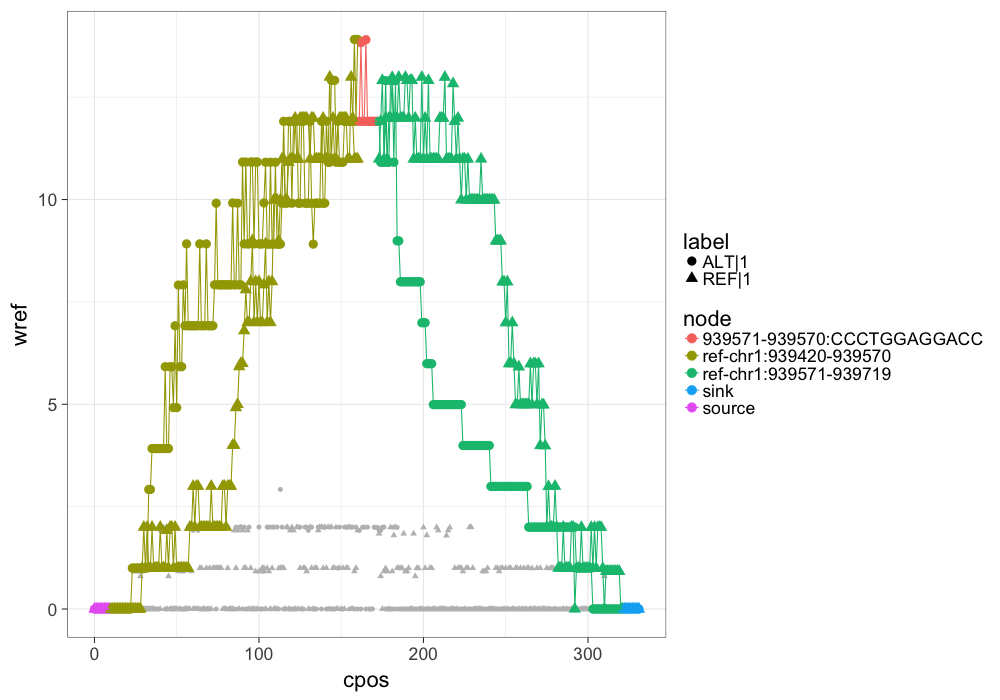

In [6]:
%%R -i test_data -w 1000 -h 700

ggplot(test_data, aes(x=cpos, y=wref, color=node, shape=label)) + 
   geom_point(mapping=aes(y=wother), color="grey", size=2) +
   geom_point(size=4) +
   geom_line() +
   theme_bw(base_size=22) 

We can see above that reads are disambiguated between REF and ALT depending on which nodes they pass through -- this is why we get different depths on each path. The grey data points indicate mismatches with the graph reference sequence (e.g. through sequencing or alignment errors).